### Passo 1: forncer um conjunto de dados de preços histórico dos ativos.

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Empresa	Código
BTG Pactual	BPAC3
B3  	  B3SA3
Taesa	  TAEE3
Eneva	  ENEV3
Vale	  VALE3
Cosan	  CSAN3
Weg       WEGE3
TOTVS	  TOTS3
Multiplan MULT3
Renner	  LREN3

In [3]:
tickers = ['LREN3.SA', 'MULT3.SA','TOTS3.SA', 'WEGE3.SA', 'CSAN3.SA', 
           'VALE3.SA', 'ENEV3.SA', 'TAEE3.SA', 'B3SA3.SA','BPAC3.SA']

In [4]:
ohlc = yf.download(tickers, period="max")

[*********************100%***********************]  10 of 10 completed


In [5]:
#Preço diário de fechamento do mercado
preços = ohlc["Adj Close"].dropna(how="all")
preços.tail()

,B3SA3.SA,BPAC3.SA,CSAN3.SA,ENEV3.SA,LREN3.SA,MULT3.SA,TAEE3.SA,TOTS3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,
2021-10-13,12.85,13.74,23.520000,15.38,34.779999,20.510000,12.51,35.740002,79.199997,40.580002
2021-10-14,12.73,13.82,23.500000,15.35,34.599998,20.190001,12.53,36.220001,79.199997,40.599998
2021-10-15,13.15,14.06,23.250000,15.41,35.750000,20.240000,12.66,35.290001,80.680000,40.119999
2021-10-18,12.92,14.37,23.260000,15.30,35.990002,20.459999,12.66,35.799999,79.919998,40.360001
2021-10-19,12.71,14.31,22.940001,14.95,34.400002,19.629999,12.67,35.020000,79.169998,39.689999


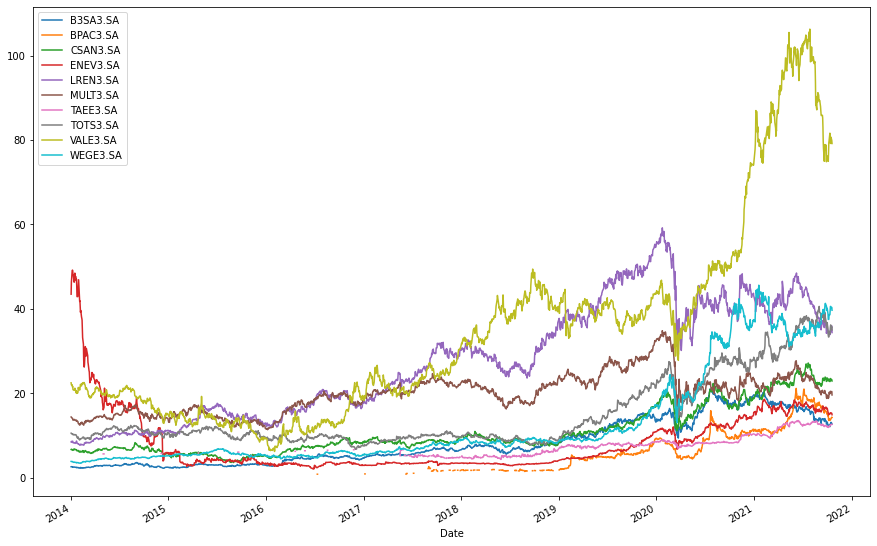

In [6]:
preços[preços.index >= "2014-01-01"].plot(figsize=(15,10));

### Passo 2: Estimando os retornos esperados

In [7]:
import pypfopt
pypfopt.__version__

'1.4.2'

In [8]:
# Retorno Esperado - usando a média histórica
from pypfopt.expected_returns import mean_historical_return
re1= mean_historical_return(preços)
re1

B3SA3.SA   -0.040313
BPAC3.SA    0.714084
CSAN3.SA    0.139742
ENEV3.SA   -0.166646
LREN3.SA   -0.213118
MULT3.SA    0.084012
TAEE3.SA    0.074089
TOTS3.SA    0.216317
VALE3.SA    0.189280
WEGE3.SA    0.304707
dtype: float64

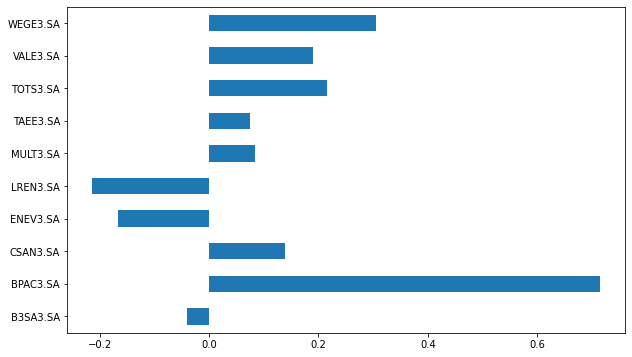

In [9]:
re1.plot.barh(figsize=(10,6));

In [10]:
# Retorno Esperado - calculado pelo CAPM - Ri=Rf+βi(E(Rm)−Rf)
from pypfopt import expected_returns

re2 = expected_returns.capm_return(preços)
re2

B3SA3.SA    0.251974
BPAC3.SA    0.203582
CSAN3.SA    0.220803
ENEV3.SA    0.212324
LREN3.SA    0.300919
MULT3.SA    0.192656
TAEE3.SA    0.051572
TOTS3.SA    0.153195
VALE3.SA    0.184680
WEGE3.SA    0.141365
Name: mkt, dtype: float64

### Estimando a matriz de covariância

In [11]:
# Esta é a matriz de covariância
from pypfopt import risk_models
from pypfopt import plotting

m_cov = risk_models.sample_cov(preços, frequency=252)
m_cov

,B3SA3.SA,BPAC3.SA,CSAN3.SA,ENEV3.SA,LREN3.SA,MULT3.SA,TAEE3.SA,TOTS3.SA,VALE3.SA,WEGE3.SA
B3SA3.SA,0.233974,0.018546,0.082629,0.052874,0.088960,0.078633,0.009877,0.049747,0.086026,0.057885
BPAC3.SA,0.018546,0.504558,0.018119,0.013584,0.014569,0.016343,0.002022,0.018756,0.006901,0.021568
CSAN3.SA,0.082629,0.018119,0.186422,0.044590,0.077099,0.068008,0.008700,0.036159,0.069931,0.045198
ENEV3.SA,0.052874,0.013584,0.044590,0.306105,0.041393,0.035458,0.007839,0.037651,0.051589,0.035643
LREN3.SA,0.088960,0.014569,0.077099,0.041393,0.271134,0.080726,0.009747,0.045507,0.046318,0.032868
MULT3.SA,0.078633,0.016343,0.068008,0.035458,0.080726,0.144740,0.008948,0.043120,0.053442,0.042561
TAEE3.SA,0.009877,0.002022,0.008700,0.007839,0.009747,0.008948,0.044494,0.006641,0.006903,0.006266
TOTS3.SA,0.049747,0.018756,0.036159,0.037651,0.045507,0.043120,0.006641,0.134727,0.038248,0.033876
VALE3.SA,0.086026,0.006901,0.069931,0.051589,0.046318,0.053442,0.006903,0.038248,0.167900,0.030891
WEGE3.SA,0.057885,0.021568,0.045198,0.035643,0.032868,0.042561,0.006266,0.033876,0.030891,0.114351


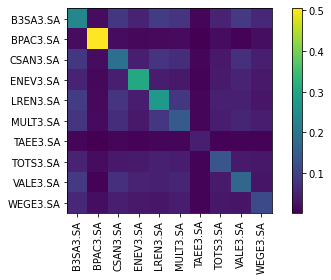

In [12]:
plotting.plot_covariance(m_cov, plot_correlation=False);

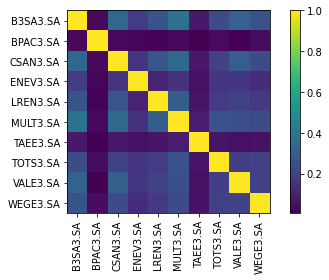

In [13]:
Est_red = risk_models.CovarianceShrinkage(preços).ledoit_wolf()
plotting.plot_covariance(Est_red, plot_correlation=True);

### Passo 3: A carteira que maximiza o Índice de Sharpe

In [14]:
# Pesos de cada Ativo - para maximizar o Índice de Sharpe
from pypfopt import EfficientFrontier

ef = EfficientFrontier (re2,Est_red)
pesos = ef.max_sharpe()
pesos

OrderedDict([('B3SA3.SA', 0.1265487253225162),
             ('BPAC3.SA', 0.2573870842873397),
             ('CSAN3.SA', 0.0988974823464207),
             ('ENEV3.SA', 0.1088955653765587),
             ('LREN3.SA', 0.1056898826995062),
             ('MULT3.SA', 0.1044879413929984),
             ('TAEE3.SA', 0.0577799754127938),
             ('TOTS3.SA', 0.0800383041820054),
             ('VALE3.SA', 0.032446251058644),
             ('WEGE3.SA', 0.027828787921217)])

In [15]:
cleaned_pesos = ef.clean_weights()
ef.save_weights_to_file("pesos.txt")  # saves to file
cleaned_pesos

OrderedDict([('B3SA3.SA', 0.12655),
             ('BPAC3.SA', 0.25739),
             ('CSAN3.SA', 0.0989),
             ('ENEV3.SA', 0.1089),
             ('LREN3.SA', 0.10569),
             ('MULT3.SA', 0.10449),
             ('TAEE3.SA', 0.05778),
             ('TOTS3.SA', 0.08004),
             ('VALE3.SA', 0.03245),
             ('WEGE3.SA', 0.02783)])

### O desempenho esperado desse portfólio é:

In [16]:
ef.portfolio_performance(verbose=True)

Expected annual return: 20.6%
Annual volatility: 18.6%
Sharpe Ratio: 1.00


(0.20634614990552475, 0.18625003908529825, 1.000516031141247)

### Minimizando a volatilidade para um determinado retorno - sugerido por Markowitz

In [17]:
Est_red = risk_models.CovarianceShrinkage(preços).ledoit_wolf()

# You don't have to provide expected returns in this case
ef = EfficientFrontier(None, Est_red, weight_bounds=(None, None))
ef.min_volatility()
pesos_2 = ef.clean_weights()
pesos_2

OrderedDict([('B3SA3.SA', 0.01225),
             ('BPAC3.SA', 0.14526),
             ('CSAN3.SA', 0.03499),
             ('ENEV3.SA', 0.04858),
             ('LREN3.SA', 0.00846),
             ('MULT3.SA', 0.07791),
             ('TAEE3.SA', 0.45445),
             ('TOTS3.SA', 0.10079),
             ('VALE3.SA', 0.03785),
             ('WEGE3.SA', 0.07946)])

In [18]:
ef.portfolio_performance(verbose=True)

Annual volatility: 14.0%


(None, 0.14004496304558192, None)